## Scenario

Travelling has significally changed thanks to technology. In earlier days,
it was not easy to travel as booking journeys used to be a hassle, where people 
needed to contact travel agents, get prices and then do a lot of paperwork.

But, with the advent of online apps, it becomes easier to book tickets. However, one
challenge is still there. Due to many available apps which offer bookings, there can be a lot
of comparisons for getting the best price.

A new Indian start-up, "MyNextBooking” is an aggregator on top of the available top
platforms (Yatra, MMT, Goibibo). It helps the user compare prices for their upcoming
journeys on its platform and the customer is redirected to the desired platform after
looking at the price.

However, they need to do a lot of analysis of the data which they have collected over a
while.

As a newly hired analyst and proficiency in Python, your role is to help them perform an in-
depth analysis

Objective: Please provide answers to the following questions:

1) Find the number of distinct bookings, sessions, and searches from the given data
sets.
2) How many sessions have more than one booking?
3) Which days of the week have the highest number of bookings? Also, draw a pie
chart to show the distribution for all days of the week?
4) For each of the service names, display the total number of bookings and the total
Gross Booking Value in INR
5) For customers who have more than 1 booking, which is the most booked route
(from_city to to_city)?
6) Which are the top 3 departure cities from where customers book mostly in advance,
provided that there have been at least 5 departures from that city?
7) Plot a heatmap displaying correlations of the numerical column and report which
pair of numerical columns in the bookings data set, have the maximum correlation?
8) For each service, which is the most used device type for making bookings on the
platform?
9) Plot the trends at a quarterly frequency for the number of bookings by each of the
device types, that is, plot a time series for each year and quarter showing the
number of bookings performed by each device type.
10) Consider the following example:
12 customers performed a total of 100 searches but only a few of them performed
10 bookings in total.

Searches = 100 bookings = 10 customers = 12

The overall booking to search ratio, Ober, is 10/100 = 0.1 Using the above
information/context, answer the following:

• What is the average oBSR for each month of the year?

• What is the average oBSR for each day of the week?

• Plot a time series of oBSR on all the given dates.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading datasets
bookings_df = pd.read_csv('Bookings.csv')
sessions_df = pd.read_csv('Sessions.csv')

In [5]:
bookings_df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4


In [7]:
sessions_df.head()

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN


In [9]:
# 1. Find distinct bookings, sessions and searches
bookings_info = bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        339 non-null    object 
 1   booking_id         339 non-null    object 
 2   from_city          339 non-null    object 
 3   from_country       339 non-null    object 
 4   to_city            339 non-null    object 
 5   to_country         339 non-null    object 
 6   booking_time       339 non-null    object 
 7   device_type_used   339 non-null    object 
 8   INR_Amount         339 non-null    float64
 9   service_name       339 non-null    object 
 10  no_of_passengers   339 non-null    float64
 11  days_to_departure  339 non-null    float64
 12  distance_km        339 non-null    float64
dtypes: float64(4), object(9)
memory usage: 34.6+ KB


In [11]:
sessions_info = sessions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   session_id             1497 non-null   object
 1   search_id              1497 non-null   object
 2   search_time            1497 non-null   object
 3   session_starting_time  1497 non-null   object
 4   booking_id             366 non-null    object
dtypes: object(5)
memory usage: 58.6+ KB


In [15]:
distinct_bookings = bookings_df['booking_id'].nunique()
distinct_sessions = sessions_df['session_id'].nunique()
disticnt_searches = sessions_df['search_id'].nunique()

In [17]:
# printing answers
print("Distinct bookings:",distinct_bookings)
print("Distinct sessions:",distinct_sessions)
print("Distinct_searches:",disticnt_searches)

Distinct bookings: 339
Distinct sessions: 331
Distinct_searches: 1360


In [19]:
# 2. How many sessions have more than one booking?

# Count the number of bookings per session
session_booking_counts = sessions_df.dropna(subset=['booking_id'])
session_booking_counts = session_booking_counts.groupby('session_id').size()

# Filter sessions with more than one booking
sessions_with_multiple_bookings = session_booking_counts[session_booking_counts > 1].count()

print("Sessions with more than one bookings:",sessions_with_multiple_bookings)


Sessions with more than one bookings: 35


In [21]:
# 3.which days of week have highest number of bookings
bookings_df['booking_time'] = pd.to_datetime(bookings_df['booking_time'])

bookings_df['day_of_week'] = bookings_df['booking_time'].dt.day_name()

per_day_booking = bookings_df['day_of_week'].value_counts()

per_day_booking

day_of_week
Thursday     65
Tuesday      59
Monday       51
Friday       51
Saturday     44
Sunday       35
Wednesday    34
Name: count, dtype: int64

<b>From above dataframe Thursdays have highest number of bookings i.e 65</b>

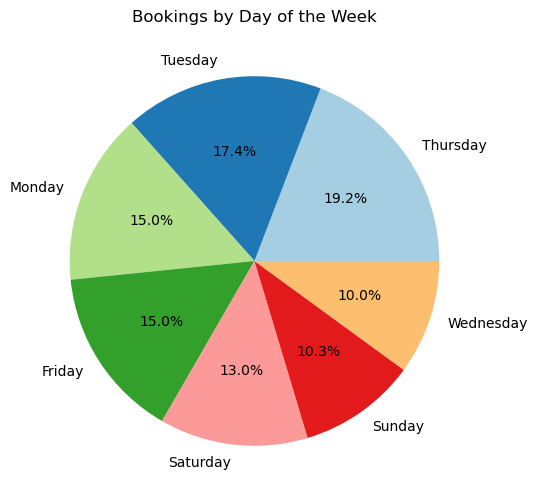

In [23]:
# ploting pie chart of days
plt.figure(figsize=(10,6))
per_day_booking.plot.pie(autopct='%1.1f%%',colors=plt.cm.Paired(range(7)))
plt.title("Bookings by Day of the Week")
plt.ylabel('')
plt.show()

In [27]:
# 4. For each of the service names, display the total number of bookings and the total 
# Gross Booking Value in INR.

service_summary = bookings_df.groupby('service_name').agg(
    total_bookings=('booking_id','count'),
    total_gbv=('INR_Amount','sum')
).reset_index()

print(service_summary)

  service_name  total_bookings   total_gbv
0      GOIBIBO             186  5897637.97
1          MMT              48   665669.08
2        YATRA             105  3378702.13


In [33]:
# 5. for customers who have booked more than one booking, which is the most booked route (from_city to to_city)?

# identify customers with more than one bookings
customers_with_multiple_bookings = bookings_df['customer_id'].value_counts()
customers_with_multiple_bookings = customers_with_multiple_bookings[customers_with_multiple_bookings>1].index

# filter bookings for these customers and find the most booked route
multiple_bookings = bookings_df[bookings_df['customer_id'].isin(customers_with_multiple_bookings)]
most_booked_route = multiple_bookings.groupby(['from_city','to_city']).size().idxmax()
print(most_booked_route)

('Gurgaon', 'Roissy-en-France')


<b>The most booked route is from Gurgaon to Roissy-en-France</b>

In [36]:
# 6. Which are top 3 departure cities from where cutomers book mostly in advance,
# provided that there have been at least 5 departures from that city?

# filter cities with at least 5 departures
cities_with_atleast_5_departures = bookings_df['from_city'].value_counts()
cities_with_atleast_5_departures = cities_with_atleast_5_departures[cities_with_atleast_5_departures>=5].index

# Calculate the average days to departure for these cities and find top 3
advance_bookings = bookings_df[bookings_df['from_city'].isin(cities_with_atleast_5_departures)]
top_departure_cities = advance_bookings.groupby('from_city')['days_to_departure'].mean().nlargest(3)
print(top_departure_cities)

from_city
Bālāpur       46.166667
Devanhalli    29.583333
Chennai       26.187500
Name: days_to_departure, dtype: float64


<b>Top 3 cities from where customers book mostly in advance, provided that there have been at leat 5 departures from that city are Balapur,Devanhalli and Chennai.</b>

In [41]:
# 7. Plot a heatmap displaying correlations of the numerical columns and report 
# which pair of numerical columns in the booking data set have maximum correlation

bookings_df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,day_of_week
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05 16:12:08+00:00,Desktop,2565.28,MMT,1.0,10.0,747.8,Wednesday
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21 08:21:47+00:00,Android,23120.00,YATRA,1.0,1.0,6701.5,Wednesday
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16 22:54:58+00:00,Android,25717.60,YATRA,1.0,32.0,7712.0,Monday
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29 12:25:38+00:00,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,Friday
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11 16:09:10+00:00,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,Tuesday


In [49]:
bookings_numerical_df = bookings_df.filter(['INR_Amount','no_of_passengers','days_to_departure','distance_km'],)

In [51]:
bookings_numerical_df.head()

,INR_Amount,no_of_passengers,days_to_departure,distance_km
0,2565.28,1.0,10.0,747.8
1,23120.00,1.0,1.0,6701.5
2,25717.60,1.0,32.0,7712.0
3,135969.60,2.0,69.0,6112.5
4,31791.20,1.0,3.0,6570.4


In [53]:
bookings_correlation_mx = bookings_numerical_df.corr()

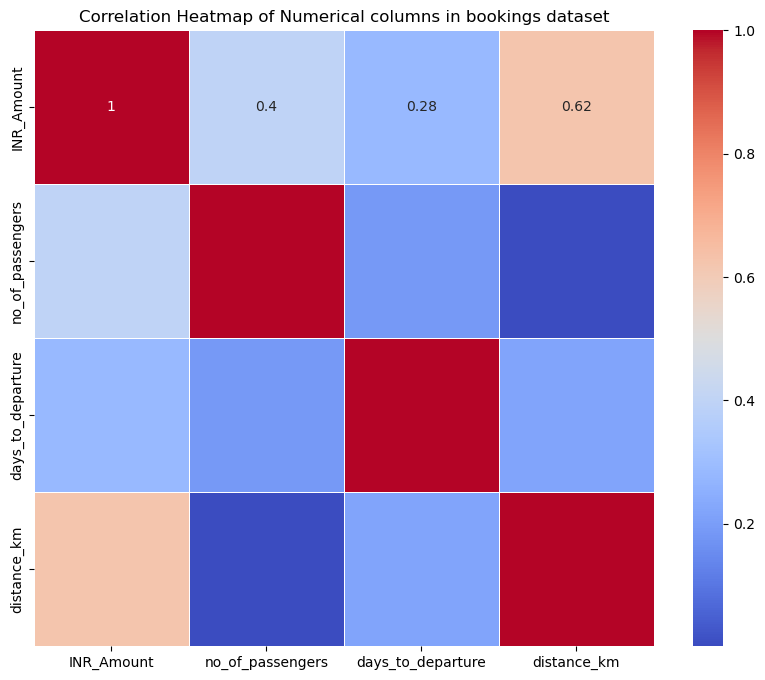

In [57]:
# plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(bookings_correlation_mx,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title("Correlation Heatmap of Numerical columns in bookings dataset")
plt.show()

In [63]:
# identify the pair with maximum correlation
max_correlation = bookings_correlation_mx.unstack().sort_values(ascending=False)
max_correlation = max_correlation[max_correlation<1]
max_corr_pair = max_correlation.idxmax()
print(max_corr_pair)

('INR_Amount', 'distance_km')


In [65]:
# 8. For each service, which is the most used device type for making bookings on the platform?

most_used_device = bookings_df.groupby(['service_name','device_type_used']).size().reset_index(name='counts')
most_used_device = most_used_device.loc[most_used_device.groupby('service_name')['counts'].idxmax()]
print(most_used_device)

  service_name device_type_used  counts
2      GOIBIBO              IOS      70
5          MMT          Desktop      30
9        YATRA          Desktop      51


C:\Users\hafee\AppData\Local\Temp\ipykernel_11200\2344921261.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bookings_df['quarter'] = bookings_df['booking_time'].dt.to_period('Q')


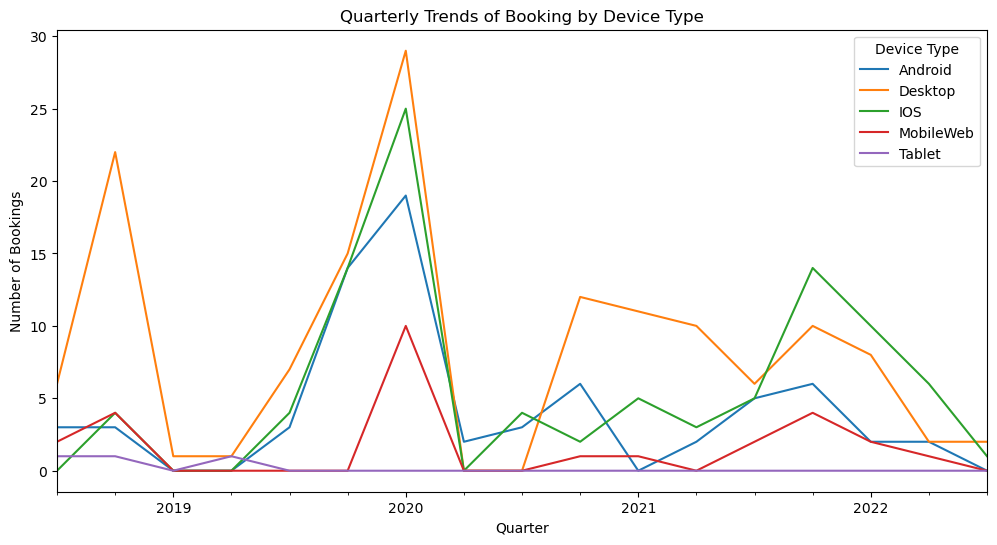

In [73]:
# 9. Plot the trends at a quarterly frequency for the number of bookings by each of the device types, 
# that is, plot a time series for each year and quarter showing the number of bookings performed by each device type.

# extract the year and quarter from 'booking_time'
bookings_df['quarter'] = bookings_df['booking_time'].dt.to_period('Q')

# groupby 'quarter' and 'device_type_used' and count the number of bookings
quarterly_trends = bookings_df.groupby(['quarter','device_type_used']).size().unstack().fillna(0)
quarterly_trends.plot(kind='line',figsize=(12,6))
plt.title("Quarterly Trends of Booking by Device Type")
plt.xlabel('Quarter')
plt.legend(title='Device Type')
plt.ylabel('Number of Bookings')
plt.show()

In [75]:
# 10. Calculate the overall Booking to Search Ratio (oBSR)

In [101]:
# 1.Calculate oBSR for each month of the year and day of the week
sessions_df.head(1)

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN
5,session_322,search_506,2020-01-21T21:10:58.482Z,2020-01-21T21:10:12Z,booking_54
6,session_283,search_880,2020-01-21T05:33:48.061Z,2020-01-21T05:33:33.559Z,booking_106
7,session_194,search_312,2019-09-05T09:04:40.423Z,2019-09-05T09:04:32Z,booking_1
8,session_52,search_1227,2020-01-20T16:54:07.232Z,2020-01-20T16:53:47.477Z,NaN
9,session_52,search_1110,2020-01-20T17:03:52.145Z,2020-01-20T16:53:47.477Z,booking_282
